<a href="https://colab.research.google.com/github/Shrey-Viradiya/DiveDeep/blob/master/Prac5b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical 5

In [1]:
!nvidia-smi

Sun Feb 28 04:34:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Shrey Viradiya
### 18BCE259

In [2]:
import tensorflow as tf
import scipy as sp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
import sklearn.metrics
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [3]:
def plot_image(image):
    plt.imshow(image.squeeze(), cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

valid_images, valid_labels, test_images, test_labels = test_images[0:1000], test_labels[0:1000], test_images[1000:], test_labels[1000:]

170500096/170498071 [==============================] - 3s 0us/step


In [5]:
type(train_images)

numpy.ndarray

In [6]:
len(train_labels)

50000

In [7]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
train_labels.shape

(50000, 10)

In [9]:
test_images.shape

(9000, 32, 32, 3)

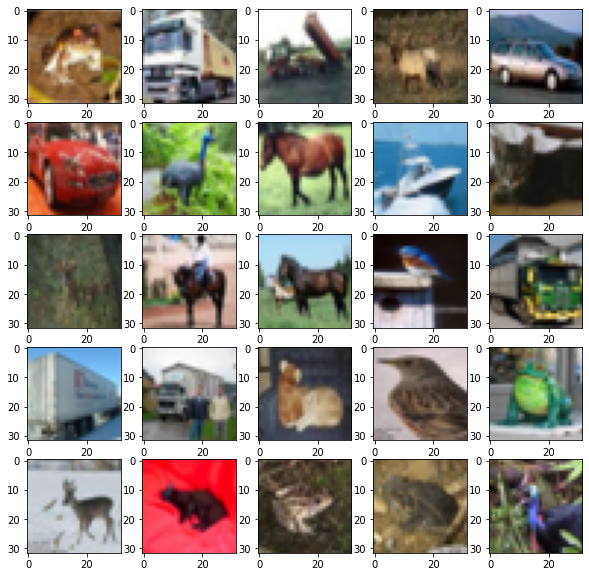

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

In [11]:
def Generator(x,y,batch_size, name):
    while 1:
        for i in range(x.shape[0] // batch_size):
            ip = x[i*batch_size:(i+1)*batch_size]
            op = y[i*batch_size:(i+1)*batch_size]
            ip = preprocess_input(tf.image.resize(ip, [224,224]))
            yield ip, op

In [12]:
resnet_model = ResNet50(weights = 'imagenet', include_top=False, input_shape = (224,224,3))

for layer in resnet_model.layers:
    layer.trainable = False

model = tf.keras.models.Sequential([
                                    resnet_model,
                                    tf.keras.layers.GlobalMaxPooling2D(),
                                    tf.keras.layers.Dropout(0.3),
                                    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

94773248/94765736 [==============================] - 0s 0us/step


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [14]:
train_gen = Generator(train_images, train_labels, 32, "train")
valid_gen = Generator(valid_images, valid_labels, 32, "test")

history = model.fit(train_gen, epochs=30, steps_per_epoch = train_images.shape[0]//32, validation_data=valid_gen, validation_steps=valid_images.shape[0]//32)

Epoch 1/30
1562/1562 [==============================] - 192s 117ms/step - loss: 2.9798 - accuracy: 0.7149 - val_loss: 1.0339 - val_accuracy: 0.8810
Epoch 2/30
1562/1562 [==============================] - 185s 118ms/step - loss: 1.5735 - accuracy: 0.8460 - val_loss: 1.0871 - val_accuracy: 0.8921
Epoch 3/30
1562/1562 [==============================] - 185s 118ms/step - loss: 1.5440 - accuracy: 0.8548 - val_loss: 1.2429 - val_accuracy: 0.8800
Epoch 4/30
1562/1562 [==============================] - 184s 118ms/step - loss: 1.6196 - accuracy: 0.8587 - val_loss: 1.2821 - val_accuracy: 0.8700
Epoch 5/30
1562/1562 [==============================] - 185s 118ms/step - loss: 1.6323 - accuracy: 0.8605 - val_loss: 1.0303 - val_accuracy: 0.8861
Epoch 6/30
1562/1562 [==============================] - 185s 118ms/step - loss: 1.7029 - accuracy: 0.8576 - val_loss: 1.1986 - val_accuracy: 0.8962
Epoch 7/30
1562/1562 [==============================] - 185s 118ms/step - loss: 1.6190 - accuracy: 0.8668 - val_

In [15]:
test_gen = Generator(test_images, test_labels, 32,"test")

test_loss, test_acc = model.evaluate(test_gen, steps=test_images.shape[0]//32)
print('\nTest accuracy:', test_acc)

281/281 [==============================] - 32s 115ms/step - loss: 1.9002 - accuracy: 0.8780

Test accuracy: 0.8780026435852051


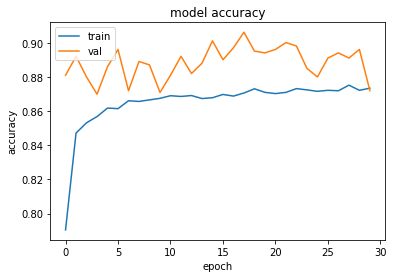

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()